In [14]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [15]:
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final (3).xlsx')
df = pd.read_excel(xls, 'CustomerDemographic')

In [16]:
df.columns

Index(['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [17]:
df.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
df.rename(columns={"Unnamed: 1":"firstname",
                   "Unnamed: 2":"lastname",
                   "Unnamed: 3":"gender",
                   "Unnamed: 4":"3y_bike_purchases",
                   "Unnamed: 5":"DOB",
                   "Unnamed: 6":"JT"}, inplace = True)
df.rename(columns={"Unnamed: 7":"Category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"D_Indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tencure"}, inplace = True)
df=df.iloc[1:]
df

,customer_id,firstname,lastname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tencure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
6,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13
7,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11
8,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7
9,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8
10,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20


In [18]:
def check_null():    
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret

NaNlist = check_null()
print(NaNlist, len(NaNlist))
# need to check columns
check = []
k     = -1
for i in NaNlist:
    k += 1
    if i > 0:
        check.append(k)
def check_unique():
    temp = list(df)
    mydict = {}
    for i in range(3, 13):
        ct = 0
        if NaNlist[i] > 0:
            ct = len(df[temp[i]].unique()) - 1
        else:
            ct = len(df[temp[i]].unique())
        mydict[temp[i]] = (ct, df[temp[i]].unique())
    return mydict

[0, 0, 125, 0, 0, 87, 506, 656, 0, 0, 302, 0, 87] 13


In [19]:
gender = [0,0,0] #the gender order goes as female, male and other
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
bike[0] += df['3y_bike_purchases'][df['gender'] == 'Female'].sum() + df['3y_bike_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['3y_bike_purchases'][df['gender'] == 'Male'].sum() + df['3y_bike_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['3y_bike_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)

[2039, 1873, 88]


([<matplotlib.axis.XTick at 0x1e821aab3c8>,
 <a list of 6 Text xticklabel objects>)

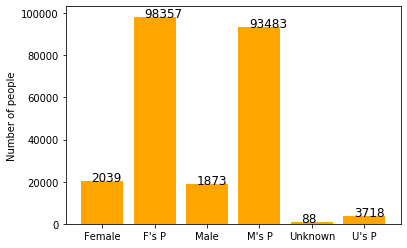

In [38]:
#visualizing the gender with size as 12

formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = 'orange')
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 12)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x1e821b207b8>,
 <a list of 3 Text xticklabel objects>)

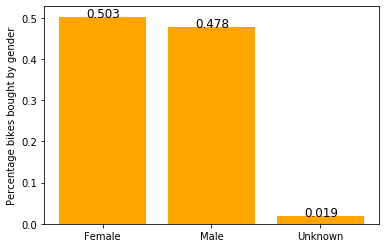

In [39]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = '')
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 12)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [22]:
# age vs bike for transformation


print(df["DOB"][1].ctime().split(" ")[4])
df["Age"] = 0
lenn = len(df["DOB"])
k    = 0
for i in range(1, lenn):
    #type is date
    if isinstance(df["DOB"][i], datetime.date):
        tl = len(df["DOB"][i].ctime().split(" "))
        df["Age"][i] += int(2019 - int(df["DOB"][i].ctime().split(" ")[tl-1]))
    #type is string
    elif isinstance(df["DOB"][i], str):
        tl = len(df["DOB"][i].split("-"))
        df["Age"][i] += int(2019 - int(df["DOB"][i].split("-")[tl-1])) 
    #time is float: means it's nan value so do nothing
print(k)

1953
0


In [23]:
df.head()

,customer_id,firstname,lastname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tencure,Age
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,66
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,39
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,65
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,58
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,42


In [24]:
ngenage = [0,0,0]                  # we make use of same index as used previously
j       = 1
ss      = 0
stdv    = []
for each in df['gender']:
    if each[0] == "F" and df['Age'][j] != 0:
        ss   += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[0] += 1
    elif each[0] == "M" and df['Age'][j] != 0:
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[1] += 1
    elif df['Age'][j] != 0: 
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[2] += 1
    j += 1
print(ss)
print(ngenage) # as we can see, unknonwn gender will unlikely to have age, don't care about gender U
#average age not counting 0 is 
mean_val = round(ss/sum(ngenage),0)
print(mean_val)
stdv_val = round(ma.sqrt(1/(sum(ngenage)-1)*sum((stdv - (ss/sum(ngenage)))**2)),0)
print(stdv_val)

166020
[2039, 1872, 1]
42.0
34.0


In [25]:
age_dict = {}
f1  = []
bf1 = []
f2  = []
bf2 = []
f3  = []
bf3 = []
f4  = []
bf4 = []
m1  = []
bm1 = []
m2  = []
bm2 = []
m3  = []
bm3 = []
m4  = []
bm4 = []
fq = mean_val - stdv_val/2
sq = mean_val
tq = mean_val + stdv_val/2
print(fq, sq, tq)
jjj = 1
for each in df['gender']:
    temp = int(df['Age'][jjj])
    bkt  = int(df['3y_bike_purchases'][jjj])
    if each[0] == "F" and temp != 0:
        if(temp <= fq):
            f1.append(temp)
            bf1.append(bkt)
        elif(fq < temp and temp <= sq):
            f2.append(temp)
            bf2.append(bkt)
        elif(sq < temp and temp <= tq):
            f3.append(temp)
            bf3.append(bkt)
        elif(tq < temp):
            f4.append(temp)
            bf4.append(bkt)
    elif each[0] == "M" and temp != 0:
        if(temp <= fq):
            m1.append(temp)
            bm1.append(bkt)
        elif(fq < temp and temp <= sq):
            m2.append(temp)
            bm2.append(bkt)
        elif(sq < temp and temp <= tq):
            m3.append(temp)
            bm3.append(bkt)
        elif(tq < temp):
            m4.append(temp)
            bm4.append(bkt)
    jjj += 1
dtt = {"Female1":f1,
       "Female2":f2,
       "Female3":f3,
       "Female4":f4,
       "Male1":m1,
       "Male2":m2,
       "Male3":m3,
       "Male4":m4,
      }

25.0 42.0 59.0


In [26]:
print(len(dtt["Female1"]), len(dtt["Female2"]), len(dtt["Female3"]), len(dtt["Female4"]))
print(len(dtt["Male1"]), len(dtt["Male2"]), len(dtt["Male3"]), len(dtt["Male4"]))

273 775 778 213
259 747 653 213


([<matplotlib.axis.XTick at 0x1e8207d17f0>,
 <a list of 8 Text xticklabel objects>)

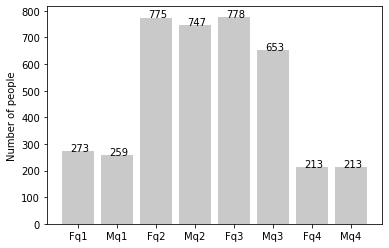

In [27]:

graphgen = [len(dtt["Female1"]), len(dtt["Male1"]), len(dtt["Female2"]), len(dtt["Male2"]), len(dtt["Female3"]), len(dtt["Male3"]), len(dtt["Female4"]), len(dtt["Male4"])]
colorr = (0.7,0.7,0.7,0.7)

x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))

In [28]:
df["Category"].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: Category, dtype: int64

([<matplotlib.axis.XTick at 0x1e820815eb8>,
 <a list of 9 Text xticklabel objects>)

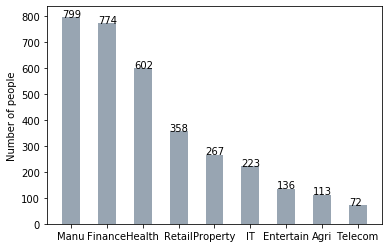

In [29]:
val = [799, 774, 602, 358, 267, 223, 136, 113, 72]
colorr = (0.2,0.3,0.4,0.5)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.5)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))

In [30]:
check_unique()["wealth_segement"]
df["wealth_segement"].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segement, dtype: int64

In [41]:
#split into 3: M (Mass), H(High), A(Affluent)
jjj = 1
wsm = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsh = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsa = {"q1":[], "q2":[], "q3":[], "q4":[]}

for each in df['wealth_segement']:
    temp = int(df['Age'][jjj])
    if each[0] == "M" and temp != 0:
        if(temp <= fq):
            wsm["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsm["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsm["q3"].append(temp)
        elif(tq < temp):
            wsm["q4"].append(temp)
    elif each[0] == "H" and temp != 0:
        if(temp <= fq):
            wsh["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsh["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsh["q3"].append(temp)
        elif(tq < temp):
            wsh["q4"].append(temp)
    elif each[0] == "A" and temp != 0:
        if(temp <= fq):
            wsa["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsa["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsa["q3"].append(temp)
        elif(tq < temp):
            wsa["q3"].append(temp)
    jjj += 1
print(len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"]))
print(len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"]))
print(len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"]))


261 777 697 219
125 399 361 111
146 346 470 0


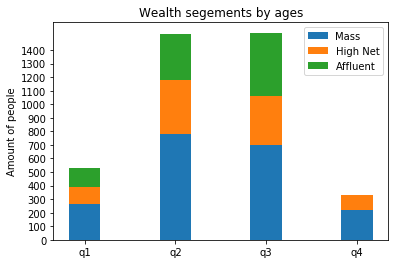

In [32]:
N = 4
wsmtp = [len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"])]
wshtp = [len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"])]
wsatp = [len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"])]

bars = np.add(wsmtp, wshtp).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wsmtp, width)
p2 = plt.bar(ind, wshtp, width,  bottom=wsmtp)
p3 = plt.bar(ind, wsatp, width,  bottom=bars)

plt.ylabel('Amount of people')
plt.title('Wealth segements by ages')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4'))
plt.yticks(np.arange(0, 1500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

plt.show()

In [42]:
df["owns_car"].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64